In [1]:
#importing basic libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#importing default dataset
from tensorflow.keras.datasets import cifar10

In [3]:
#loading dataset
# setting class names from dataset
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 34s 0us/step


In [4]:
#normalizing train data
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [5]:
#normalizing test data
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

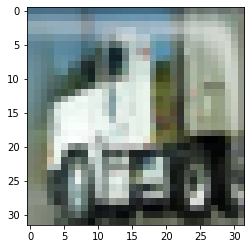

In [6]:
#random check dataset
plt.imshow(x_test[222])

In [7]:
#Building CNN model
cnn_model=tf.keras.models.Sequential()

# First Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

# Second Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

# Max Pooling Layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# Third Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

# Fourth Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

# Max Pooling Layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# fifth Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"))

# Sixth Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"))

# Max Pooling Layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# Flattening Layer
cnn_model.add(tf.keras.layers.Flatten())

# Droput Layer
cnn_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

# Adding the first fully connected layer
cnn_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output Layer
cnn_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

In [9]:
#Model -compiling
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [10]:
#Model - training
cnn_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 115s 73ms/step - loss: 1.8392 - sparse_categorical_accuracy: 0.3107
Epoch 2/15
1563/1563 [==============================] - 115s 73ms/step - loss: 1.1402 - sparse_categorical_accuracy: 0.5918
Epoch 3/15
1563/1563 [==============================] - 115s 74ms/step - loss: 0.9228 - sparse_categorical_accuracy: 0.6776
Epoch 4/15
1563/1563 [==============================] - 114s 73ms/step - loss: 0.7929 - sparse_categorical_accuracy: 0.7173
Epoch 5/15
1563/1563 [==============================] - 115s 74ms/step - loss: 0.7003 - sparse_categorical_accuracy: 0.7536
Epoch 6/15
1563/1563 [==============================] - 116s 74ms/step - loss: 0.6416 - sparse_categorical_accuracy: 0.7737
Epoch 7/15
1563/1563 [==============================] - 118s 75ms/step - loss: 0.5809 - sparse_categorical_accuracy: 0.7933
Epoch 8/15
1563/1563 [==============================] - 119s 76ms/step - loss: 0.5507 - sparse_categorical_accuracy: 0.8052
Epoch 9/

In [11]:
#Accuracy and loss
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 5s 16ms/step - loss: 0.6533 - sparse_categorical_accuracy: 0.7946
Test accuracy: 0.7946000099182129
